# Preliminary Data Wrangling

## 1: Initializing list of dataframes for each year

I chose to create a list to conveniently store and access the dataframe for shot data form every year.

In [113]:
import pandas as pd, numpy as np, scipy as sp, matplotlib.pyplot as plt

#FG is a list that will store each year's shot data in order
FG = []
test2019 = pd.read_csv('Shot Data - CSV/Shot Data - 2018-2019.csv')

#loop through all years, adding each year's dataframe to the list
for year in range(1997,2020):
    yearint = int(year)
    yeardf = pd.read_csv('Shot Data - CSV/Shot Data - ' + str(yearint - 1) + '-' + str(yearint) + '.csv')
    FG.append(yeardf)

test2019
#now FG is a list of dataframes, length 23. Access each year in sequential order by indices 0 (1996 - 97) to 22 (2018 - 19).

,Unnamed: 0,LESS THAN 8FT.,Unnamed: 2,Unnamed: 3,8-16 FT.,Unnamed: 5,Unnamed: 6,16-24 FT.,Unnamed: 8,Unnamed: 9,24+ FT.,Unnamed: 11,Unnamed: 12
0,TEAM,FGM-C,FGA-C,FG%-C,FGM-M,FGA-M,FG%-M,FGM-L,FGA-L,FG%-L,FGM-T,FGA-T,FG%-T
1,Atlanta Hawks,1858,3275,56.7,334,859,38.9,136,359,37.9,1064,3010,35.3
2,Boston Celtics,1606,2687,59.8,484,1100,44,329,809,40.7,1032,2820,36.6
3,Brooklyn Nets,1773,3197,55.5,349,843,41.4,138,360,38.3,1040,2940,35.4
4,Charlotte Hornets,1690,3081,54.9,386,883,43.7,244,618,39.5,975,2743,35.5
5,Chicago Bulls,1848,3331,55.5,408,1031,39.6,267,725,36.8,743,2104,35.3
6,Cleveland Cavaliers,1584,2914,54.4,468,1133,41.3,291,751,38.7,846,2374,35.6
7,Dallas Mavericks,1626,2768,58.7,361,884,40.8,173,471,36.7,1021,2971,34.4
8,Denver Nuggets,1884,3288,57.3,447,1003,44.6,211,532,39.7,896,2543,35.2
9,Detroit Pistons,1687,3099,54.4,285,759,37.5,221,528,41.9,992,2820,35.2


## 2: Gathering summary data across years

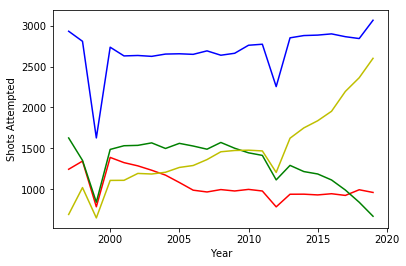

In [114]:
#lists to store the league-wide means for short, medium, and long-distance shots ATTEMPTED across years
xs_yearly = []
s_yearly = []
m_yearly = []
l_yearly = []

xs_mean, s_mean, m_mean, l_mean = 0,0,0,0

#list for dataframes converted to numeric values only, team names and labels removed
FG_nums = []


test2019 = test2019.iloc[1:30, 1:12]
test2019 = test2019.apply(pd.to_numeric, errors='ignore')

for df in FG:
    #convert dtype to int and float, cause it was object originally for some reason, add to list of converted dfs for future use
    df = df.iloc[1:30, 1:12]
    df = df.apply(pd.to_numeric, errors='ignore')
    FG_nums.append(df)
    #assign the year's means for each type of shot to respective variable
    xs_mean = df.iloc[:,1:2].mean(0)
    s_mean = df.iloc[:,4:5].mean(0)
    m_mean = df.iloc[:,7:8].mean(0)
    l_mean = df.iloc[:,10:11].mean(0)
    #store every mean in a list of means across the years
    xs_yearly.append(xs_mean.iloc[0])
    s_yearly.append(s_mean.iloc[0])
    m_yearly.append(m_mean.iloc[0])
    l_yearly.append(l_mean.iloc[0])
    
#now plot the means across time to see how average shots attempted has evolved over time
#creating x-axis...
X = []
for i in range(1997,2020):
    X.append(i)
#plotting shot data
xs_line = plt.plot(X, xs_yearly, c='b', label='<8ft')
s_line = plt.plot(X, s_yearly, c='r', label='8-16ft shots')
m_line = plt.plot(X, m_yearly, c='g', label='16-24ft shots')
l_line = plt.plot(X, l_yearly, c='y', label='24+ft shots')
plt.xlabel('Year')
plt.ylabel('Shots Attempted')
plt.show()
#FG[0]